# Question 1

## Submitted by: Supreet Singh CS16BTECH11038

**Assuming Grayscale Images!**

Code for NCC:

In [60]:
import numpy as np
import scipy as sp

In [83]:
import numpy as np
def my_pad(im, size, size2):
    return np.pad(im, [size2,size], mode='constant', constant_values=[0,0])

# No need for padding here. This is to be used only for tempplate matching
# Neighborhood is pixels to the right
# This makes it simpler in case of rectangular kernel. 

def my_ncc(im_in, kernel):
    # 2k+1 x 2k+1 matrix
    k = (int(kernel.shape[0]/2))
    k2 = (int(kernel.shape[1]/2))
    im_out = np.zeros(im_in.shape)
    
    for i in range(0, im_in.shape[0]-kernel.shape[0]+1):
        for j in range(0, im_in.shape[1]-kernel.shape[1]+1):
                        
            p_sum = 0

            # if remove padding then need to change im_out indices here to i, j
            sec = im_in[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            ncc_mean = np.mean(sec)
            ncc_std = np.std(sec)
            
            if ncc_std == 0:
                ncc_std = 1
            
            im_out[i][j] = np.sum(np.multiply(kernel, (sec-ncc_mean)/ncc_std))
            
    return im_out

In [85]:
#Test example
#my_ncc(np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]), np.array([[0,0,0], [0,1,0], [0,0,0]]))

## (A)

(355, 290)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

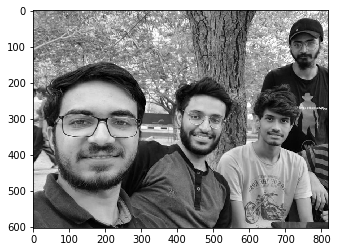

In [90]:
import matplotlib.pyplot as plt
q1_a_in = plt.imread('my.jpg')
q1_a_t = plt.imread('my_temp1.jpg')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

print(rgb2gray(q1_a_t).shape)

q1_a_in = rgb2gray(q1_a_in)
q1_a_t = rgb2gray(q1_a_t)

plt.imshow(q1_a_in, cmap='gray')
plt.plot

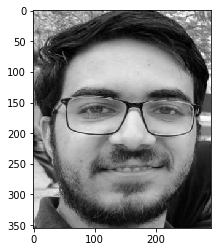

In [91]:
plt.imshow(q1_a_t, cmap='gray')


In [92]:
q1_a_out = my_ncc(q1_a_in, q1_a_t)

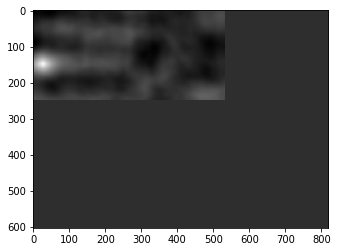

In [93]:
plt.imshow(q1_a_out, cmap='gray')

## Explaination of results

In my NCC function for template matching, we are given inputs that are rectangular matrices. That's why, I have used this (translated) corelation:

out(i,j) = $ \sum_{u,v} {in(i+u, j+v) * template(u,v)} $

The **peak** intensity occurs at a point where the template is fully matched. Since this correlation function writes the correlation value at the top right corner of the sub-image, the peak white spot obtained in the image (near (0,150)) is because the template's top right corner in that image is located at that point.

Bottom right has black pixels, because this correlation function writes values only to top right corner, and we haven't done any padding (don't need for template matching). So, the bottom and right sub-images have their corresponding co-relation values written to their top right corners in the output. Sub images which extend outside the bound of the original image are ignored, as they are not needed.

## (B)

(21, 22)


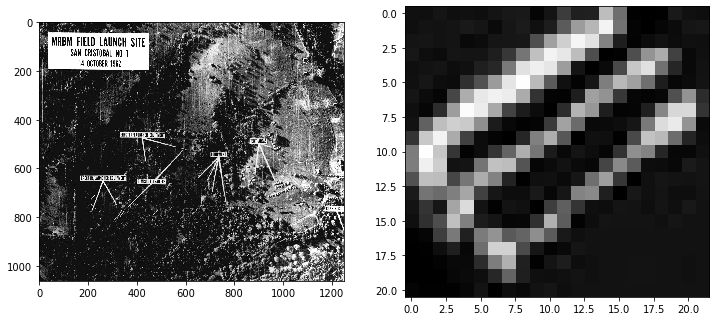

In [393]:
import matplotlib.pyplot as plt
q1_b_in = plt.imread('u2cuba.jpg')
q1_b_t = plt.imread('trailer.png')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

print(rgb2gray(q1_b_t).shape)

q1_b_in = rgb2gray(q1_b_in)
q1_b_t = rgb2gray(q1_b_t)

f = plt.figure(figsize=(12,12))
f.add_subplot(1,2,1)
plt.imshow(q1_b_in, cmap='gray')
f.add_subplot(1,2,2)
plt.imshow(q1_b_t, cmap='gray')
plt.show()

In [142]:
q1_b_out = my_ncc(q1_b_in, q1_b_t)


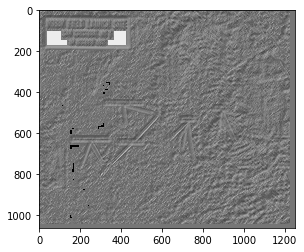

In [143]:
plt.imshow(q1_b_out, cmap='gray')

**Explaination:**  Note that the two rectangular white spots are there because the original image is completely white in those areas and standard deviation turns out to be 0 (while normalizing).

The straight line artifacts are visible because although the pattern is not exactly matched, correlation of these white lined artifacts with the template is more than that compared to the rest of the image. That's why we see slightly white edge like straight line artifacts.

## (C)

In [150]:
q1_b_t = plt.imread('trailerSlightlyBigger.png')
q1_b_in = plt.imread('u2cuba.jpg')

q1_b_in = rgb2gray(q1_b_in)
q1_b_t = rgb2gray(q1_b_t)


In [151]:
q1_b_out = my_ncc(q1_b_in, q1_b_t)

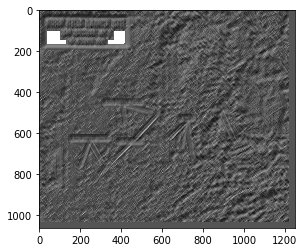

In [154]:
plt.imshow(q1_b_out, cmap='gray')

Here a slightly bigger template is used, which matches the image even less compared to the small template. That is why the straight line artifacts are less clear compared to the previous one. 

Thus cross-corelation has the downsides that if the template is of a different scale/rotation than the same part in the original image, it might not clearly detect the object. 

## (D)

The answer should be: $ O(n^2 m^2 N_s N_r )  $

This is because for a fixed size and rotation of the image, $ O(n^2 m^2) $ operations are required (i.e. at each point of the image you compute the correlation)

# Question 2 - myconv2d

* The input image is **padded** with '0' pixels as necessary.
* Input image and kernel are assumed to be **square** matrices.

In [22]:
import numpy as np

In [23]:
import numpy as np
def my_pad(im, size, size2):
    return np.pad(im, [size2,size], mode='constant', constant_values=[0,0])

In [37]:
# 
# Assuming an ODD x ODD Kernel
# Arguments: 2 np (matrices)
def my_conv2d(im_in, kernel):
    # 2k+1 x 2k+1 matrix
    k = (int(kernel.shape[0]/2))
    
    im_out = np.zeros(im_in.shape)
    
    lim = im_in.shape[0]
    
    #print(im_in)
    
    p_im_in = my_pad(im_in, k, k)
    
    #print(im_in)
    
    
    for i in range(k, lim+k):
        for j in range(k, lim+k):
                
            sec = p_im_in[i-k:i+k+1, j-k:j+k+1]
            
            im_out[i-k][j-k] = np.sum(np.multiply(kernel, sec))     
    
    return im_out
    


In [57]:
# Test example
# my_conv2d(np.array([[1,2,3,4,5], [1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]]), np.array([[0,0,0], [0,1,0], [0,0,0]]))

# Question 3

## (A)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [31]:
q3_in = plt.imread('clown.tif')
#q3_in = rgb2gray(q3_in)

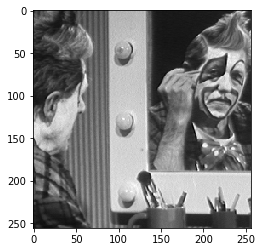

In [35]:
plt.imshow(q3_in, cmap='gray')


In [41]:
sobel_x = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

### Using Sobel for vertical edges

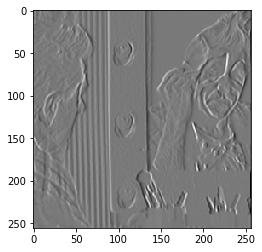

In [44]:
q3_sbx = my_conv2d((q3_in), sobel_x)
plt.imshow(q3_sbx, cmap='gray')


### Using Sobel for Horizontal Edges

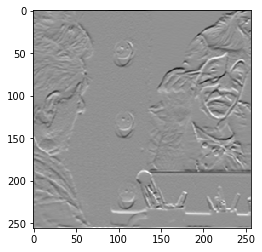

In [45]:
q3_sby = my_conv2d((q3_in), sobel_y)
plt.imshow(q3_sby, cmap='gray')

### Approx Magnitude of Filter responses

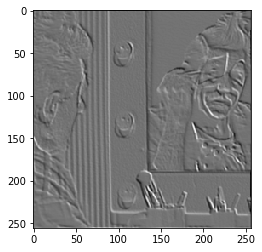

In [46]:
plt.imshow(q3_sbx+q3_sby, cmap='gray')

### Using Laplacian

In [47]:
lap = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])

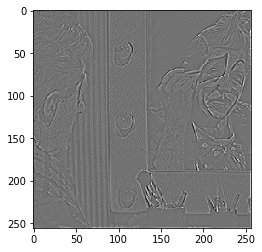

In [48]:
q3_lap = my_conv2d((q3_in), lap)
plt.imshow(q3_lap, cmap='gray')

### Comments

Sobel_X filter detects vertical edges (or edges that have a vertical component) - it does not detect any completely horizontal edge. Similarly, Sobel_y detects horizontal edges.

Approximately adding both the resulting images gives a result that has both the horizontal and vertical edges. 

Edges detected by Laplacian seem to be finer compared to the ones detected by Sobel. Sobel detects thicker edges, which are easier for visibility but Laplacian seems to give a finer, more accurate result. The result from Laplacian seems a bit grainy.

## (B) Using scipy's convolve2d.

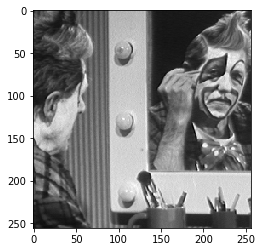

In [49]:
from scipy import signal
plt.imshow(q3_in, cmap='gray')


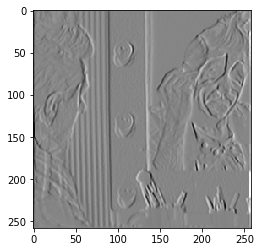

In [53]:
q3_sbx = signal.convolve2d((q3_in), sobel_x)
plt.imshow(q3_sbx, cmap='gray')


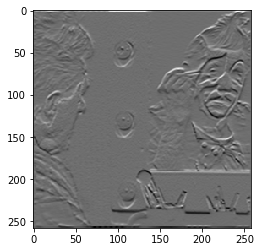

In [54]:
q3_sby = signal.convolve2d((q3_in), sobel_y)
plt.imshow(q3_sby, cmap='gray')


### Sum of Sobel Filter responses

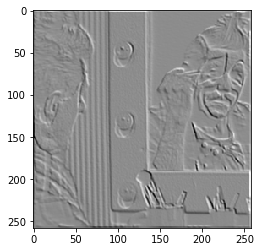

In [55]:
plt.imshow(q3_sbx+q3_sby, cmap='gray')

### Gaussian

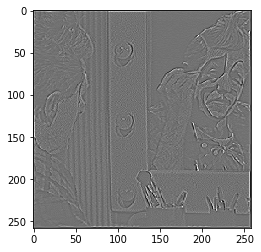

In [56]:
q3_lap = signal.convolve2d((q3_in), lap)
plt.imshow(q3_lap, cmap='gray')

### Comments

Scipy's convolve2d seems to a bit faster than myconv2d.

# Question 4

**NOTE:** 
Low pass filter is simply a gaussian filter, with specfied Std Deviation. High pass filter is **Image - Low Pass Filter**

## Code for generating hybrid images

In [165]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Assuming colored images
# return tuple of two hybrid images: 
# -  (HPF(im1) + LPF(im2) ), (HPF(im2) + LPF(im1))
# i.e. im1 should be observable from a distance, but from nearby img2 will dominate.

def hybrid(im1, im2, sigma):
    lp1 = ndimage.gaussian_filter(im1, (sigma,sigma,0))
    hp = np.subtract(im1, lp1)
    lp = ndimage.gaussian_filter(im2, (sigma,sigma,0))
    out1 =  np.add(hp, lp)
    
    lp1 = ndimage.gaussian_filter(im2, (sigma,sigma,0))
    hp = np.subtract(im2, lp1)
    lp = ndimage.gaussian_filter(im1, (sigma,sigma,0))
    out2 = np.add(hp,lp)
    
    return out1, out2

In [383]:
# Some values of image and sigma pairs for some interesting results
# Please preserve this order in loading images. 
# cat, dog: sigma = 7
# bird, plane, 2.5
# bicycle, motorcycle, 4
# fish, submarine, 4.5
# Einstein, marilyin, 2.25

## An interesting Hybrid Image Generated

In [355]:
im1 = plt.imread('Data for Hybrid Images/einstein.bmp')
im2 = plt.imread('Data for Hybrid Images/marilyn.bmp')


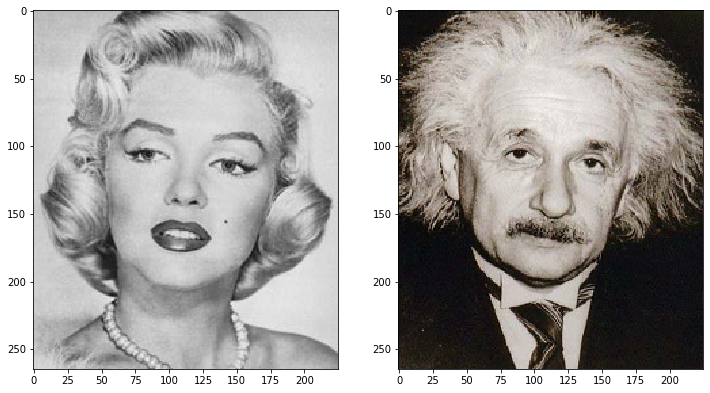

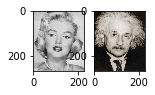

In [382]:
f = plt.figure(figsize=(12,12))
f.add_subplot(1,2,1)
plt.imshow(im2)
f.add_subplot(1,2,2)
plt.imshow(im1)
plt.show()

f = plt.figure(figsize=(2,2))
f.add_subplot(1,2,1)
plt.imshow(im2)
f.add_subplot(1,2,2)
plt.imshow(im1)
plt.show()

In [380]:
# Generating the hybrid images
o1, o2 = hybrid(im1, im2, 2.25)

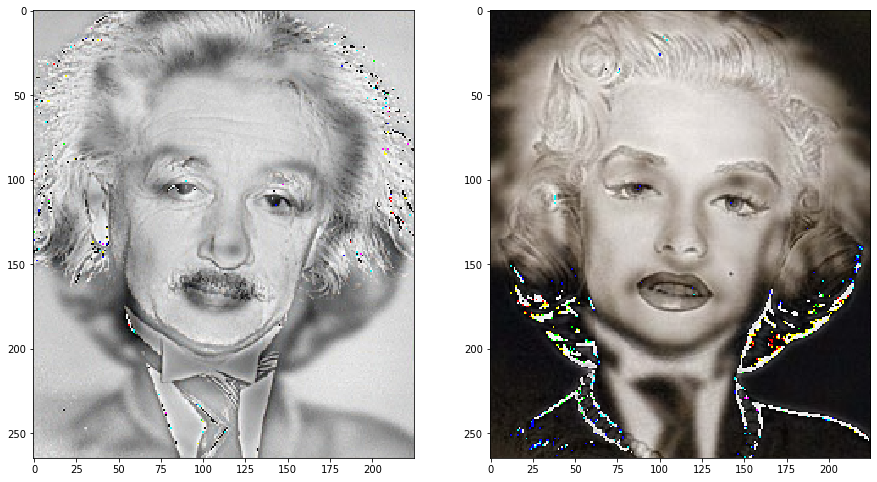

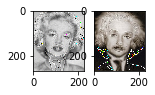

In [381]:
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2,1)
plt.imshow(o1)
f.add_subplot(1,2,2)
plt.imshow(o2)
plt.show()

f = plt.figure(figsize=(2,2))
f.add_subplot(1,2,1)
plt.imshow(o1)
f.add_subplot(1,2,2)
plt.imshow(o2)
plt.show()

The **first hybrid image** is created by taking the **LOW** frequency part of **Marilyn** and **HIGH** frequency part of **Einstein**. Vice-versa for the **second hybrid image**.

First image looks like a young, female einstein from a closer distance. At a larger distance, it looks like Marilyn.
The second image looks an old Marilyn from close by, but Einstein from larger distance. 

# Question 5

I have looked at **Emboss** filter in Gimp.

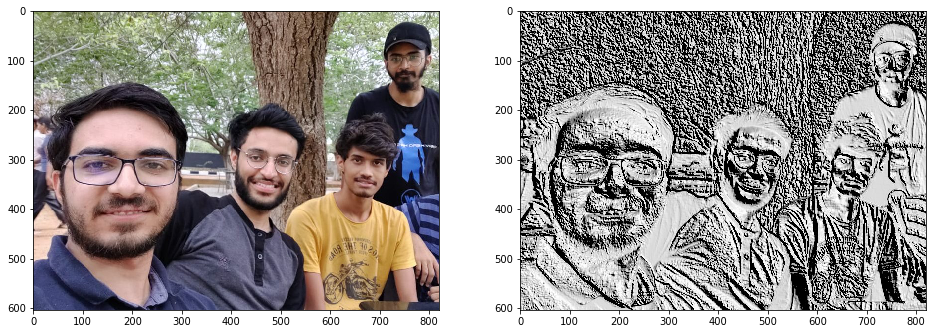

In [387]:
im1 = plt.imread('my.jpg')
im2 = plt.imread('my_emboss.jpg')

f = plt.figure(figsize=(16,16))
f.add_subplot(1,2,1)
plt.imshow(im1)
f.add_subplot(1,2,2)
plt.imshow(im2)
plt.show()

I think internally it uses a difference filter that emphasises difference along a direction, after converting the image to grayscale. 

A possible filter could be :

[[-10, -1, 0], 

 [ -3,  1,   2],

 [ 0, 1.5,  10]]
 
This filter **emphasizes difference** along top to bottom diagonal direction.

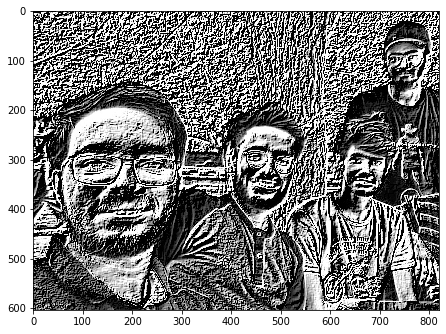

In [390]:
im1 = plt.imread('my_emboss_fil.jpg')


f = plt.figure(figsize=(16,16))
f.add_subplot(1,2,1)
plt.imshow(im1, cmap='gray')
plt.show()

The above is the result of applying the sample kernel on the original image. It is similar to the effect generated by gimp.